In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   hands_on_machine_learning/chapter_7 Ensemble Learning and Random Forests.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [16]:
! cd drive/MyDrive/MachineLearning/ && git log


commit d663dfe18377b477b6d347941e4625ac0899cabc (HEAD -> master)
Author: Marlon Menendez <marlon.menendezg@gmail.com>
Date:   Wed Nov 10 17:19:45 2021 +0000

    Some test

commit 2d97269588c6a0fccd51c00eea7fed3d3d3b0bc9
Author: Marlon Menendez <marlon.menendezg@gmail.com>
Date:   Wed Nov 10 17:10:05 2021 +0000

    First Commit of this folder


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import xgboost

from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_moons, load_iris, fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

import sys
sys.path.insert(0, '/content/gdrive/MyDrive/MachineLearning/hands_on_machine_learning')
import ml_functions

Mounted at /content/gdrive/


In [ ]:
# Data set for the notebook

x, y = make_moons(n_samples=10000, noise=0.4)

x_train, x_test, y_train, y_test = train_test_split(x, y)

# Voting Classifiers

In [ ]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard'
)

voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                             

In [ ]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  clf.fit(x_train, y_train)
  y_hat = clf.predict(x_test)
  print(f'The accuracy for {clf.__class__.__name__} is {accuracy_score(y_test, y_hat)}')

The accuracy for LogisticRegression is 0.8324
The accuracy for RandomForestClassifier is 0.846
The accuracy for SVC is 0.8616
The accuracy for VotingClassifier is 0.8572


# Bagging and Pasting

## Bagging and Pasting in Scikit-Learn

In [ ]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=100,
    bootstrap=True,
    n_jobs=-1
)

bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_test)

print(f'The Accuracy of the Bagging model based on Decision Trees is {accuracy_score(y_test, y_pred)}')

The Accuracy of the Bagging model based on Decision Trees is 0.8636


## Ou-of-Bag Evaluation

In [ ]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    bootstrap=True,
    n_jobs=-1,
    oob_score=True
)

In [ ]:
bag_clf.fit(x_train, y_train)
bag_clf.oob_score_

0.8374666666666667

In [ ]:
y_hat = bag_clf.predict(x_test)
accuracy_score(y_hat, y_test)

0.8444

# Random Forests

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(x_train, y_train)

y_pred_rf = rnd_clf.predict(x_test)

## Extra-Trees

In [ ]:
extra_rf_clf = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
extra_rf_clf.fit(x_train, y_train)

y_pred_extra_rf = extra_rf_clf.predict(x_test)

In [ ]:
print(f'The accuracy of the Random Forest is {accuracy_score(y_test, y_pred_rf)}')
print(f'The accuracy of the Extra-Trees is {accuracy_score(y_test, y_pred_extra_rf)}')

The accuracy of the Random Forest is 0.86
The accuracy of the Extra-Trees is 0.856


In [ ]:
# Do a grid search for both the Random Forest and Extra-Trees

rf_params = [
    {'n_estimators': [250, 500, 750], 'criterion': ['gini', 'entropy'], 'max_leaf_nodes': [12, 16, 20, 24, 30], 'n_jobs': [-1], }
]

rf_clf = RandomForestClassifier()

rf_grid_search = GridSearchCV(rf_clf, rf_params, cv=5)

rf_grid_search.fit(x_train, y_train)
rf_grid_search.best_params_

{'criterion': 'gini', 'max_leaf_nodes': 30, 'n_estimators': 500, 'n_jobs': -1}

In [ ]:
extra_params = [
    {'n_estimators': [250, 500, 750], 'criterion': ['gini', 'entropy'], 'max_leaf_nodes': [12, 16, 20, 24, 30], 'n_jobs': [-1], }
]

extra_clf = ExtraTreesClassifier()

extra_grid_search = GridSearchCV(extra_clf, extra_params, cv=5)

extra_grid_search.fit(x_train, y_train)
extra_grid_search.best_params_

{'criterion': 'entropy',
 'max_leaf_nodes': 30,
 'n_estimators': 500,
 'n_jobs': -1}

In [ ]:
# Create two estimators with the best params of the Grid Search made previously, and compare to the previous models
best_rf_clf = RandomForestClassifier(**rf_grid_search.best_params_)

best_rf_clf.fit(x_train, y_train)
y_pred_best_rf = best_rf_clf.predict(x_test)

print(f'The accuracy of this Random Forest is {accuracy_score(y_test, y_pred_best_rf)}, and the diference with the previous one is {accuracy_score(y_test, y_pred_best_rf) - accuracy_score(y_test, y_pred_rf)}')

The accuracy of this Random Forest is 0.8624, and the diference with the previous one is 0.0024000000000000687


In [ ]:
# Now with the Extra-Trees model
best_extra_clf = ExtraTreesClassifier(**extra_grid_search.best_params_)

best_extra_clf.fit(x_train, y_train)
y_pred_best_extra = best_extra_clf.predict(x_test)

print(f'The accuracy of this Extra-Trees is {accuracy_score(y_test, y_pred_best_extra)}, and the diference with the previous one is {accuracy_score(y_test, y_pred_best_extra) - accuracy_score(y_test, y_pred_extra_rf)}')

The accuracy of this Extra-Trees is 0.8584, and the diference with the previous one is 0.0024000000000000687


## Feature Importance

In [ ]:
iris = load_iris()

rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris['data'], iris['target'])

for name, score in zip(iris['feature_names'], rnd_clf.feature_importances_):
  print(name, score)

sepal length (cm) 0.10032611447709255
sepal width (cm) 0.025063983956876684
petal length (cm) 0.4271467856563252
petal width (cm) 0.4474631159097056


In [ ]:
# Get the feature importance for the MNIST dataset

mnist = fetch_openml('mnist_784', version=1)

x, y = mnist['data'], mnist['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
rnd_clf.fit(x_train, y_train)
feats_importances = rnd_clf.feature_importances_

In [ ]:
feats_importances.shape

(784,)

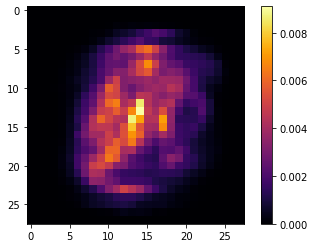

In [ ]:
feats_importance_image = feats_importances.reshape(28, 28)

plt.imshow(feats_importance_image, cmap='inferno')
plt.colorbar()
plt.show()

# Boosting

## AdaBoost

AdaBoost works training an estimator on the training data and then predicting on the same training data. Then, it increases the weight of those instances that were underfitted, and trains a new estimator over the training data with the weights updated.

- Weight error rate of the $j^{th}$ predictor
> $r_{j} = \frac{\underset{ \hat{y_{j}}^{(i)} \neq y^{(i)} }{\sum\limits_{i=1}^{m}{w^{(i)}}}}{\sum\limits_{i=1}^{m}{w^{(i)}}}$

Then the weight of the predictor is calculated. The more accurate the predictor, the higher its weight will be.

- Predictor weight
> $\alpha_{j} = \eta \text{log}\frac{1-r_j}{r_j}$

Then AdaBoost upates the weight of the instances

- Weight update rule
> $\text{for } i = 1,2,..., m \\ w^{(i)}\leftarrow\begin{cases}{w^{(i)} \quad \quad \quad \quad \quad \text{if } \hat{y_{j}}^{(i)} = y^{(i)} }\\{w^{(i)} \text{exp}(\alpha_j) \quad \quad \text{if } \hat{y_{j}}^{(i)} \neq y^{(i)}  }\end{cases}$

Then the weights are normalized. The process ends when the desired number of predictors is found or when a perfect predictor is found.

To predict, AdaBoost use the predictions of all the predictors using their predictor weights $\alpha_j$. The predicted class is the one with more weighted votes.

- AdaBoost predictions
> $ \hat{y}(\textbf{x}) = \underset{k}{\text{argmax}} \underset{\hat{y}_j (x) = k}{\sum\limits_{j=1}^{N}{\alpha_j}}$

In [ ]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200,
    algorithm='SAMME.R', 
    learning_rate=0.5)

ada_clf.fit(x, y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

## Gradient Boosting

Gradient Boosting works like AdaBoost, by sequentially adding predictors to the ensemble, but instead of updating weights of the predictors and instances, GB trains the new predictors on the *residual errors* of the previous predictors.

Using Decision Trees as base predictor is called *Gradient Tree Boosting* or *Gradient Boosted Regression Trees* (GBRT).

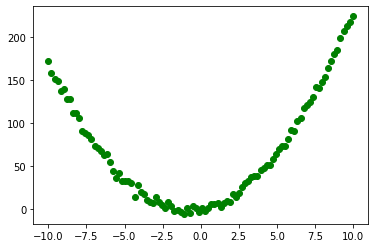

In [ ]:
# Generate training data for regression using the quadratic equation

x_reg = np.linspace(-10, 10, 100)
gaussian_noise = np.random.normal(0, 4, 100)
y_reg = 2*x_reg**2 + 3*x_reg + gaussian_noise

x_reg = x_reg.reshape(-1, 1)
y_reg = y_reg.reshape(-1, 1)

plt.scatter(x_reg, y_reg, color='green')
plt.show()

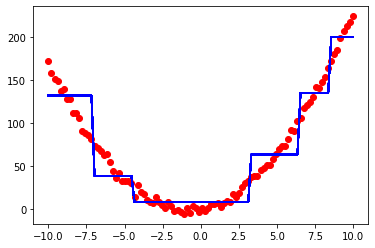

In [ ]:
tree_reg_1 = DecisionTreeRegressor(max_depth=2)
tree_reg_1.fit(x_reg, y_reg)
y_reg_2 = y_reg - tree_reg_1.predict(x_reg)

tree_reg_2 = DecisionTreeRegressor(max_depth=2)
tree_reg_2.fit(x_reg, y_reg_2)
y_reg_3 = y_reg_2 - tree_reg_2.predict(x_reg)

tree_reg_3 = DecisionTreeRegressor(max_depth=2)
tree_reg_3.fit(x_reg, y_reg_3)

y_pred = sum(tree.predict(x_reg) for tree in (tree_reg_1, tree_reg_2, tree_reg_3))

plt.scatter(x_reg, y_reg, color='red')
plt.plot(x_reg, y_pred, color='blue')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


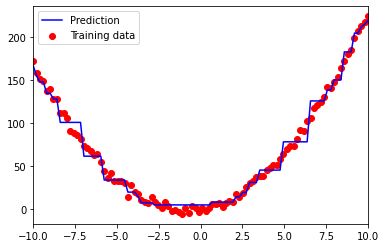

In [ ]:
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=10, learning_rate=0.5)
gbrt.fit(x_reg, y_reg)

y_pred_gbrt = gbrt.predict(x_reg)

plt.scatter(x_reg, y_reg, color='red', label='Training data')
plt.plot(x_reg, y_pred_gbrt, color='blue', label='Prediction')
plt.xlim(-10, 10)
plt.legend()
plt.show()

Let's now try to optimize the GBRT model with GridSearch:

In [ ]:
gbrt_params = [
    {'max_depth':[2, 3, 4], 'n_estimators' : [5, 10, 15, 20], 'learning_rate':[1, 0.5, 0.25]}
]

gbrt_reg = GradientBoostingRegressor()

grid_gbrt = GridSearchCV(gbrt_reg,
                         gbrt_params,
                         cv=5,
                         scoring='neg_mean_squared_error',
                         return_train_score=True)

grid_gbrt.fit(x_reg, y_reg)

grid_gbrt.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

{'learning_rate': 1, 'max_depth': 4, 'n_estimators': 10}

In [ ]:
best_gbrt = GradientBoostingRegressor(**grid_gbrt.best_params_)

best_gbrt.fit(x_reg, y_reg)
y_gbrt_best = best_gbrt.predict(x_reg)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


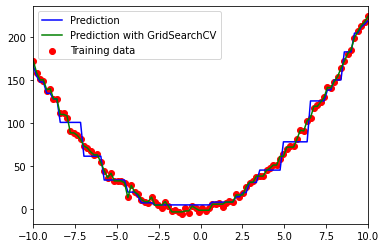

In [ ]:
plt.scatter(x_reg, y_reg, color='red', label='Training data')
plt.plot(x_reg, y_pred_gbrt, color='blue', label='Prediction')
plt.plot(x_reg, y_gbrt_best, color='green', label='Prediction with GridSearchCV')
plt.xlim(-10, 10)
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


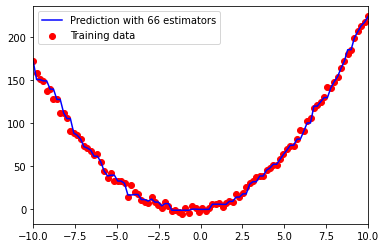

In [ ]:
# Implement the staged_predict() method to find the optimal number of estimators (trees)

x_train, x_val, y_train, y_val = train_test_split(x_reg, y_reg)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(x_train, y_train)

errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(x_val)]

bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators)
gbrt_best.fit(x_train, y_train)

y_pred_best = gbrt.predict(x_reg)

plt.scatter(x_reg, y_reg, color='red', label='Training data')
plt.plot(x_reg, y_pred_best, color='blue', label=f'Prediction with {bst_n_estimators} estimators')
plt.xlim(-10, 10)
plt.legend()
plt.show()

In [ ]:
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(x_train, y_train, eval_set=[(x_val, y_val)], early_stopping_rounds=2)

y_pred_xgb = xgb_reg.predict(x_reg)

[15:09:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:76.0436
Will train until validation_0-rmse hasn't improved in 2 rounds.
[1]	validation_0-rmse:68.9148
[2]	validation_0-rmse:62.484
[3]	validation_0-rmse:56.7421
[4]	validation_0-rmse:51.8669
[5]	validation_0-rmse:47.0944
[6]	validation_0-rmse:42.9056
[7]	validation_0-rmse:39.182
[8]	validation_0-rmse:35.632
[9]	validation_0-rmse:32.5766
[10]	validation_0-rmse:29.9485
[11]	validation_0-rmse:27.1765
[12]	validation_0-rmse:24.6186
[13]	validation_0-rmse:22.5492
[14]	validation_0-rmse:20.6112
[15]	validation_0-rmse:18.8352
[16]	validation_0-rmse:17.2465
[17]	validation_0-rmse:15.8824
[18]	validation_0-rmse:14.6169
[19]	validation_0-rmse:13.5918
[20]	validation_0-rmse:12.613
[21]	validation_0-rmse:11.8999
[22]	validation_0-rmse:11.1951
[23]	validation_0-rmse:10.4451
[24]	validation_0-rmse:9.75211
[25]	validation_0-rmse:9.11055
[26]	validation_0

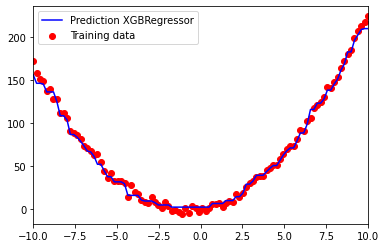

In [ ]:
plt.scatter(x_reg, y_reg, color='red', label='Training data')
plt.plot(x_reg, y_pred_xgb, color='blue', label=f'Prediction XGBRegressor')
plt.xlim(-10, 10)
plt.legend()
plt.show()

# Exercises

1. If you have trained five different models on the exact same training data, and they all achieve 95% precision, is there any chance that you can combine these models to get better results? If so, how? If not, why?

> It is possible to combine this five models through Ensemble Learning. To do so, we can combine the predictions of the five models using hard or soft voting (depending if the models can output the probability of each class or not) and aggregate the predictions (mode for hard voting and average for soft voting) into a final prediction.

2. What is the difference between hard and soft voting classifiers?

> Hard voting uses the most common class predicted by the predictors, that is, the mode of the predictions. On the other hand, soft voting aggregates the predictions using the average of all the predictions and selects the class with the highest probability. This is only available when using estimators that can estimate the probability for every possible class.

3. Is it possible to speed up training of a bagging ensemble by distributing it across multiple servers? What about pasting ensembles, boosting ensembles, Random Forests, or stacking ensembles?

> It is possible to distribute the load of work among different cpu cores or servers when using ensemble methods that parallelize the training. This is valid for algorithms such as Bagging, pasting, and Random Forest where you can train several predictors at the same time. For Boosting ensembles is not possible since this requires to train the different algorithms in a sequential way. For stack, the process is sequential, however each step may be individually parallelized.


4. What is the benefit of out-of-bag evaluation?

> When training a Bagging algorithm, the predictor is trained only on 63% of the training instances. This 37% of training instances that are not used for training can be used to evaluate the predictor since this subset has not been used for the training. This makes possible to have an unbiased evaluation of the predictor.

5. What makes Extra-Trees more random than regular Random Forests? How can
this extra randomness help? Are Extra-Trees slower or faster than regular Random Forests?

> Extra-Trees are more random than Random Forest because in Extra-Trees the algorithm does not look for the optimal threshold for the features, selecting random thresholds. This can provide more variety of decision trees and avoid the algorithm looking for the optimal threshold. This makes the Extra-Trees faster when training than Random Forests, since looking for the optimal threshold is one of the most time demanding task with Random Trees.

6. If your AdaBoost ensemble underfits the training data, which hyperparameters
should you tweak and how?

> If AdaBoost is underfitting the training data the hyperparameter to tweak is the number of estimators. In this case, increasing the number of estimators will help to avoid underfitting.

7. If your Gradient Boosting ensemble overfits the training set, should you increase or decrease the learning rate?

> if GB is overfitting the training set, we should decrease the learning rate. Another solution will be try to decrease the number of predictors in the GB using early stopping.

8. Load the MNIST data (introduced in Chapter 3), and split it into a training set, a validation set, and a test set (e.g., use 50,000 instances for training, 10,000 for validation, and 10,000 for testing). Then train various classifiers, such as a Random Forest classifier, an Extra-Trees classifier, and an SVM classifier. Next, try to combine them into an ensemble that outperforms each individual classifier on the validation set, using soft or hard voting. Once you have found one, try it on the test set. How much better does it perform compared to the individual classifiers?


In [ ]:
# Load the MNIST data
mnist = fetch_openml('mnist_784', version=1)
x, y = mnist['data'], mnist['target']

x_train, x_val, x_test = x[:50000], x[50000:60000], x[60000:]
y_train, y_val, y_test = y[:50000], y[50000:60000], y[60000:]

In [ ]:
# Create the 3 predictors and their params for GridSearchCV
rnd_clf = RandomForestClassifier()
rnd_params = [
    {'n_estimators' : [50, 100, 250, 500], 'criterion' : ['gini', 'entropy'], 'max_depth' : [2, 3, 4, 5], 'n_jobs' : [-1]}
]

extra_clf = ExtraTreesClassifier()
extra_params = [
    {'n_estimators' : [50, 100, 250, 500], 'criterion' : ['gini', 'entropy'], 'max_depth' : [2, 3, 4, 5], 'n_jobs' : [-1]}
]

#svc will need the data to be scaled, therefore we will need a pipeline
svm_pipeline = Pipeline([
  ('scaler', StandardScaler()),
  ('SVC', SVC(kernel='rbf', probability=True, C=0.1)),
])

In [ ]:
# Create the GridSearch for all the predictors
rnd_search = GridSearchCV(rnd_clf, rnd_params, cv=5)
rnd_search.fit(x_train, y_train)

extra_search = GridSearchCV(extra_clf, extra_params, cv=5)
extra_search.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=None,
                                            oob_score=False, random_state=None,
                                            verbose=0, warm_start=False),
             iid='deprecate

In [ ]:
# Get the best estimators from the previous search
best_rnd = rnd_search.best_estimator_
best_rnd.fit(x_train, y_train)

best_extra = extra_search.best_estimator_
best_extra.fit(x_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=5, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
# Fit the SVM
svm_pipeline.fit(x_train, y_train)

In [ ]:
for model in (best_rnd, best_extra, svm_pipeline):

  ml_functions.model_evaluation_clf(model, x_test, y_test)

These are the results of the model RandomForestClassifier:
	Accuracy: 0.8705
These are the results of the model ExtraTreesClassifier:
	Accuracy: 0.8468
These are the results of the model Pipeline:
	Accuracy: 0.9319


In [ ]:
voting_clf = VotingClassifier(
    estimators=[('rnd', best_rnd), ('extra',best_extra), ('svm', svm_pipeline)],
    voting='soft',
    n_jobs=-1
)

voting_clf.fit(x_train, y_train)

In [ ]:
ml_functions.model_evaluation_clf(voting_clf, x_test, y_test)

9. Run the individual classifiers from the previous exercise to make predictions on the validation set, and create a new training set with the resulting predictions: each training instance is a vector containing the set of predictions from all your classifiers for an image, and the target is the image’s class. Train a classifier on this new training set. Congratulations, you have just trained a blender, and together with the classifiers it forms a stacking ensemble! Now evaluate the ensemble on the test set. For each image in the test set, make predictions with all your classifiers, then feed the predictions to the blender to get the ensemble’s predictions. How does it compare to the voting classifier you trained earlier?
